# Police Violence in the US

In [21]:
#Jacob Richey, October 24th 2016, Big Data

# Introduction

In [22]:
import scipy.stats as st
import matplotlib.pyplot as plt
import operator
%matplotlib inline

In [23]:
PVfile = open("PoliceViolence_city.csv", "r", errors="ignore")
KPfile = open("Killed_By_Police.csv", "r", errors="ignore")

policeViolence = []
killedByPolice = []

def dataAdd (file, addList):
    for i in file:
        addList.append(i)
    del addList[0]
    for i in range(len(addList)):
        addList[i] = addList[i].split(",")
        
dataAdd(PVfile, policeViolence)
dataAdd(KPfile, killedByPolice)

for row in range(len(policeViolence)):
    for column in range(3, 25):
        policeViolence[row][column] = float(policeViolence[row][column])

print(policeViolence[0])
print()
print(killedByPolice[0])

['New Mexico', 'Albuquerque', 'Albuquerque Police Department', 15.0, 3.0, 545852.0, 14878.0, 229933.0, 20627.0, 13674.0, 418.0, 14092.0, 1224.0, 10043.0, 255055.0, 558874.0, 4934.0, 30.0, 8.8, 5.4, 27.5, 201.6, 67.2, 13.4, 28.48]

['Keith Lamont Scott', 'Unknown', 'Male', 'Black', '9/20/16', 'Charlotte', 'NC', 'Charlotte-Mecklenburg Police Department', 'Gunshot', 'Unclear\n']


Here are two data sets addressing Police Violence in the US. One gives specific numbers about 100 police departments in major cities in the United States. The other gives detailed data on every person killed by the police since January 1st, 2013. In this report, I ask a variety of questions I find interesting, and use code to solve for these questions.

The questions include:
- Does a higher rate of violent crime make it more likely for police to kill people?
- Does a larger black population by percentage make it more likely for police to kill black people?
- In which state are you most likely to be killed by police if you are of any race?
- In which state are you most likely to be killed if you are black?
- What race is most likely to be killed unarmed in the country?
- Is there a correlation between the police homicide rate for black people and the black-white dissimilarity of the city?

For my analysis of these questions, I use both data sets above and a csv of population numbers in each state to gather my data, and correlation coefficients and other statistics methods to make my analysis.

## Does a higher rate of violent crime make it more likely for police to kill people?

R Value: 0.216269790548


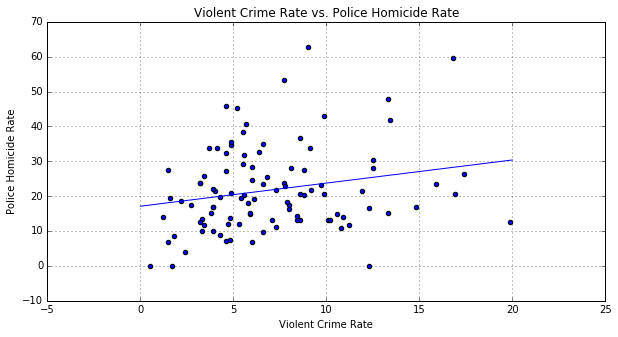

In [26]:
crimeRate = []
killRate = []

for i in range(len(policeViolence)):
    crimeRate.append(i)
    killRate.append(i)
    crimeRate[i] = policeViolence[i][18]
    killRate[i] = policeViolence[i][20]

slope, intercept, r_value, p_value, std_err = st.linregress(crimeRate, killRate)

print("R Value:", r_value)

plt.figure(figsize=(10,5))
plt.grid()
plt.title("Violent Crime Rate vs. Police Homicide Rate")
plt.xlabel("Violent Crime Rate")
plt.ylabel("Police Homicide Rate")
plt.scatter(crimeRate, killRate)
plt.plot([0, 20], [intercept, (slope*20)+intercept])

I took reported data from police departments on the violent crime rate (violent crime per 100,000 people), and the police homicide rate (people killed by police per 100,000 people), and graphed them together. I then calculated a best fit line and the correlation coefficient.

The relationship between violent crime rate and total police homicide rate is present, but weak. The closer the correlation coefficient (r value) is to +1 or -1, the more closely the two variables are related. If r is close to 0, it means there is no relationship between the variables. The r value for this relation is 0.2163, meaning there is a positive relationship, but it is not strong at all. This is also demonstrated by the great variance of the points on the graph from the best fit line running through the range. 

So, while there is a small correlation between the violent crime rate and police homicide rate, it is a very weak correlation and not very conclusive. I would suspect this is because a higher violent crime rate typically means more aggressive criminals, which would offer up more situations in which police officers might be forced to shoot someone. 

## Does a larger black population by percentage make it more likely for police to kill black people?

R Value: -0.263231250181


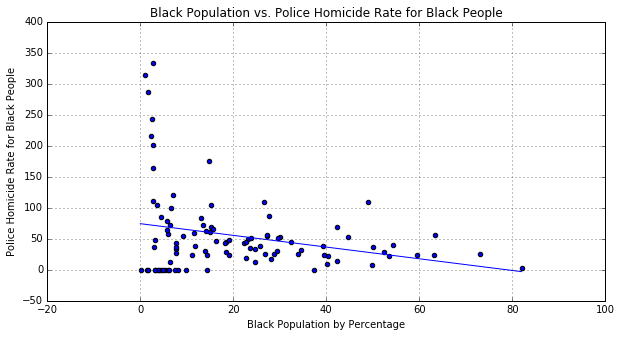

In [27]:
black_population_percentage = []
liklihood_police_kill_blacks = []

for i in range(len(policeViolence)):
    black_population_percentage.append(i)
    liklihood_police_kill_blacks.append(i)
    black_population_percentage[i] = (policeViolence[i][6] / policeViolence[i][5])*100
    liklihood_police_kill_blacks[i] = policeViolence[i][21]

slope, intercept, r_value, p_value, std_err = st.linregress(black_population_percentage, liklihood_police_kill_blacks)

print("R Value:", r_value)

plt.figure(figsize=(10,5))
plt.grid()
plt.title("Black Population vs. Police Homicide Rate for Black People")
plt.xlabel("Black Population by Percentage")
plt.ylabel("Police Homicide Rate for Black People")
plt.scatter(black_population_percentage, liklihood_police_kill_blacks)
plt.plot([0, 82], [intercept, (slope*82)+intercept])

For this question, I used reported data by police departments on the police homicide rate for black people and the black population by percentage in that city. 

Like the previous question, the relationship between black population by percentage and total police homicide rate for blacks is present, but weak (r = -0.2632). However, the correlation coefficient is negative, meaning there is a negative correlation. This is also represented by the best fit line which has a negative slope. 

While the correlation is weak, it shows the higher the black population by percentage is, the less likely police are to kill blacks. This might be because police officers are less likely to feel unreasonably threatened by black people when they are more used to seeing black people in normal life. If a police officer's only interaction with black people is when he's arresting them, this will lead to a racist and derogatory view of black people. 

## In which state are you most likely to be killed by police if you are of any race?

In [45]:
stateCodes = []
populations = []

Popfile = open("states.csv", "r", errors="ignore")

for i in Popfile:
    populations.append(i)
for i in range(len(populations)):
    populations[i] = populations[i].split(",")
    
del populations[0]

for i in range(len(killedByPolice)):
    stateCodes.append(i)
    stateCodes[i] = killedByPolice[i][6]
    
state_count = {}
for x in stateCodes:
    if x not in state_count:
        state_count[x] = []
        state_count[x].append(1)
    else:
        state_count[x][0]+=1
    
del state_count['PN']
del state_count['"']
del state_count['Dublin']

for i in range(len(populations)):
    state_count[populations[i][1]].append(float((populations[i][2])))

for i in state_count:
    percent = round(state_count[i][0] / state_count[i][1]*100000, 2)
    state_count[i].append(percent)
    
sorted_x = sorted(state_count.items(), key = operator.itemgetter(1), reverse = True)

print("Total Police Homicides:")
print(sorted_x)

percent = {}

for x in state_count:
    percent[x] = state_count[x][2]
    
sorted_percent = sorted(percent.items(), key = operator.itemgetter(1), reverse = True)

print()
print("Police Homicide Rate (per 100,000 people):")
print(sorted_percent)

Total Police Homicides:
[('CA', [715, 39144818.0, 1.83]), ('TX', [390, 27469114.0, 1.42]), ('FL', [348, 20271272.0, 1.72]), ('AZ', [180, 6828065.0, 2.64]), ('NC', [130, 10042802.0, 1.29]), ('GA', [124, 10214860.0, 1.21]), ('OH', [117, 11613423.0, 1.01]), ('IL', [115, 12859995.0, 0.89]), ('NY', [113, 19795791.0, 0.57]), ('WA', [107, 7170351.0, 1.49]), ('OK', [107, 3911338.0, 2.74]), ('MO', [100, 6083672.0, 1.64]), ('PA', [98, 12802503.0, 0.77]), ('CO', [98, 5456574.0, 1.8]), ('TN', [89, 6600299.0, 1.35]), ('LA', [88, 4670724.0, 1.88]), ('MD', [86, 6006401.0, 1.43]), ('AL', [85, 4858979.0, 1.75]), ('NM', [76, 2085109.0, 3.64]), ('MI', [75, 9922576.0, 0.76]), ('SC', [72, 4896146.0, 1.47]), ('VA', [71, 8382993.0, 0.85]), ('NJ', [70, 8958013.0, 0.78]), ('IN', [68, 6619680.0, 1.03]), ('OR', [65, 4028977.0, 1.61]), ('NV', [64, 2890845.0, 2.21]), ('KY', [61, 4425092.0, 1.38]), ('WI', [54, 5771337.0, 0.94]), ('MN', [50, 5489594.0, 0.91]), ('MS', [47, 2992333.0, 1.57]), ('MA', [44, 6794422.0, 0.

I pulled from the Killed By Police file every person that was killed and the state in which they were killed, and organized those numbers by states.

The first set of numbers is total police homicides since January 1st, 2013, because that is when this data set was started. The state code is given for each value, and then preceded by three numbers. The first is total police homicides, by which the data is organized. California clearly has the most, with 715 killings, however this data alone doesn't tell me that much, because California has such a large population. That's why the second and third numbers exist. The second number is the population of the state, and the third number is the police homicide rate per 100,000 people. For California, this number is 1.83, meaning for every 100,000 people, an average of 1.83 people are killed by police. 

The second set of numbers given is the state code and the police homicide rate, sorted. I can conclude that the highest number of killings per capita occurs in New Mexico, then DC, then Oklahoma. 

## In which state are you most likely to be killed if you are black?

In [44]:
state_codes_black = []
recalibration = 0

for i in range(len(killedByPolice)):
    if killedByPolice[i][3][0:3] == 'Bla':
        state_codes_black.append(recalibration)
        state_codes_black[recalibration] = killedByPolice[i][6]
        recalibration+=1
    
state_count_black = {}

for x in state_codes_black:
    if x not in state_count_black:
        state_count_black[x] = []
        state_count_black[x].append(1)
    else:
        state_count_black[x][0]+=1
    
print("Number of black people killed by police in each state:")
print(state_count_black)
print("Length of list:", len(state_count_black))
    
del state_count_black['PN']

state_count_black.update({'ME': [0], 'MT': [0], 'ND': [0], 'NH': [0], 'SD': [0], 'VT': [0], 'WY': [0], 'ID': [0]})

print()
print("Number of black people killed by police in each state (factoring in states where that number is 0):")
print(state_count_black)
print("Length of list:", len(state_count_black))

for i in range(len(populations)):
    state_count_black[populations[i][1]].append(float((populations[i][3])))

for i in state_count_black:
    percent = round(state_count_black[i][0] / state_count_black[i][1]*100000, 2)
    state_count_black[i].append(percent)
    
sorted_x_black = sorted(state_count_black.items(), key = operator.itemgetter(1), reverse = True)

print()
print("Total Police Homicides for Black People:")
print(sorted_x_black)

percent_black = {}

for x in state_count:
    percent_black[x] = state_count_black[x][2]
    
sorted_percent_black = sorted(percent_black.items(), key = operator.itemgetter(1), reverse = True)

print()
print("Police Homicide Rate (per 100,000) for black people:")
print(sorted_percent_black)

Number of black people killed by police in each state:
{'WV': [4], 'DC': [19], 'LA': [44], 'MA': [12], 'PN': [1], 'FL': [125], 'NM': [3], 'CT': [4], 'RI': [2], 'VA': [31], 'MO': [41], 'IN': [24], 'IA': [3], 'TX': [92], 'UT': [3], 'MS': [20], 'KS': [9], 'GA': [51], 'CA': [115], 'IL': [55], 'AZ': [15], 'NJ': [30], 'NV': [9], 'MD': [56], 'MN': [11], 'OH': [52], 'AK': [2], 'PA': [29], 'NY': [53], 'AL': [36], 'SC': [24], 'OR': [3], 'CO': [10], 'AR': [9], 'WI': [15], 'KY': [11], 'MI': [27], 'OK': [35], 'NE': [6], 'WA': [11], 'NC': [51], 'DE': [4], 'HI': [1], 'TN': [21]}
Length of list: 44

Number of black people killed by police in each state (factoring in states where that number is 0):
{'WV': [4], 'DC': [19], 'LA': [44], 'MA': [12], 'FL': [125], 'NM': [3], 'CT': [4], 'RI': [2], 'VA': [31], 'MO': [41], 'ND': [0], 'VT': [0], 'IN': [24], 'ID': [0], 'IA': [3], 'TX': [92], 'WY': [0], 'SD': [0], 'UT': [3], 'MS': [20], 'KS': [9], 'GA': [51], 'CA': [115], 'IL': [55], 'AZ': [15], 'NJ': [30], 'NV': 

This conclusion was a bit harder to reach. First, I followed a similar method as for the previous question. The first set of numbers displayed gives the number of black people killed in each state. However, the number below, the length of the list, indicates a problem. The length is 44. There are more than 44 states (51, including the District of Columbia). This means that in 7 states, there were no black people killed. I still have to include that data in the list in order to properly analyze it. 

The second set of numbers give a list that has a length of 51, and includes every state's number of black people killed.

The third set is in the same format as the first set from the last question. State code, followed by total killings, population of black people in the state, and black people killed per 100,000 people. 

The fourth set organizes the data by the homicide rate. Oklahoma police kill the most black people, followed by Utah, Arkansas, Nebraska, and then New Mexico. The statistic for Utah is misleading however, because the Utah black population is so low, making the per capita data value be skewed. 

## What race is most likely to be killed unarmed in the country?

In [47]:
black_killings = 0
white_killings = 0
hispanic_killings = 0
native_killings = 0
asian_killings = 0
unarmed_black = 0
unarmed_white = 0
unarmed_hispanic = 0
unarmed_native = 0
unarmed_asian = 0

for x in range(len(killedByPolice)):
    if killedByPolice[x][3][0:3] == 'Bla':
        black_killings+=1
        if killedByPolice[x][9][0:7] == 'Unarmed':
            unarmed_black+=1
    elif killedByPolice[x][3][0:3] == 'Whi':
        white_killings+=1
        if killedByPolice[x][9][0:7] == 'Unarmed':
            unarmed_white+=1
    elif killedByPolice[x][3][0:3] == 'His':
        hispanic_killings+=1
        if killedByPolice[x][9][0:7] == 'Unarmed':
            unarmed_hispanic+=1
    elif killedByPolice[x][3][0:3] == 'Nat':
        native_killings+=1
        if killedByPolice[x][9][0:7] == 'Unarmed':
            unarmed_native+=1
    elif killedByPolice[x][3][0:3] == 'Asi':
        asian_killings+=1
        if killedByPolice[x][9][0:7] == 'Unarmed':
            unarmed_asian+=1
        
print("Since Jan 1, 2013:")
print("Unarmed Blacks killed:", unarmed_black)
print("\tOut of:", black_killings, "killed")
print("\tPercent Killed Unarmed:", round(unarmed_black/black_killings*100, 1))
print("Unarmed Whites killed:", unarmed_white)
print("\tOut of:", white_killings, "killed")
print("\tPercent Killed Unarmed:", round(unarmed_white/white_killings*100, 1))
print("Unarmed Hispanics killed:", unarmed_hispanic)
print("\tOut of:", hispanic_killings, "killed")
print("\tPercent Killed Unarmed:", round(unarmed_hispanic/hispanic_killings*100, 1))
print("Unarmed Native Americans killed:", unarmed_native)
print("\tOut of:", native_killings, "killed")
print("\tPercent Killed Unarmed:", round(unarmed_native/native_killings*100, 1))
print("Unarmed Asians killed:", unarmed_asian)
print("\tOut of:", asian_killings, "killed")
print("\tPercent Killed Unarmed:", round(unarmed_asian/asian_killings*100, 1))

Since Jan 1, 2013:
Unarmed Blacks killed: 295
	Out of: 1179 killed
	Percent Killed Unarmed: 25.0
Unarmed Whites killed: 317
	Out of: 1877 killed
	Percent Killed Unarmed: 16.9
Unarmed Hispanics killed: 137
	Out of: 705 killed
	Percent Killed Unarmed: 19.4
Unarmed Native Americans killed: 6
	Out of: 39 killed
	Percent Killed Unarmed: 15.4
Unarmed Asians killed: 8
	Out of: 76 killed
	Percent Killed Unarmed: 10.5


To gather this data, I took the data set reporting every person killed by police, and pulled out ONLY the people who had been killed unarmed. I then sorted them by race. In addition, I divided the total number of killings of each race by the number of killings unarmed, to give the percent killed unarmed statistic. 

The data shows you are most likely to be killed AND be unarmed if you are black. While more white people have been killed overall since 2013, a significantly  higher percentage of black people killed were unarmed. 25% of black people killed by the police are unarmed. Hispanics are the next likely at 19.4%, then whites at 16.9%, then Native Americans at 15.4%, and finally Asians at 10.5%.  

## Is there a correlation between the police homicide rate for black people and the black-white dissimilarity of the city?

R Value: -0.258203449774


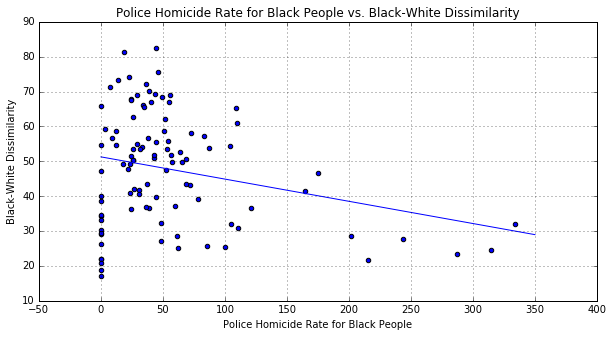

In [50]:
homicide_rate_4_blacks = []
black_white_dissimilarity = []

for i in range(len(policeViolence)):
    homicide_rate_4_blacks.append(i)
    black_white_dissimilarity.append(i)
    homicide_rate_4_blacks[i] = policeViolence[i][21]
    black_white_dissimilarity[i] = policeViolence[i][24]

slope, intercept, r_value, p_value, std_err = st.linregress(homicide_rate_4_blacks, black_white_dissimilarity)

print("R Value:", r_value)

plt.figure(figsize=(10,5))
plt.grid()
plt.title("Police Homicide Rate for Black People vs. Black-White Dissimilarity")
plt.xlabel("Police Homicide Rate for Black People")
plt.ylabel("Black-White Dissimilarity")
plt.scatter(homicide_rate_4_blacks, black_white_dissimilarity)
plt.plot([0, 350], [intercept, (slope*350)+intercept])

The data gathering for this question was fairly easy. I simply took the police homicide rate for black people and the black-white dissimilarity data from the police department file, and graphed them against each other. I included a best fit line and the r value above. There is a weak correlation, that is negative.

The higher the black-white dissimilarity, the lower the police homicide rate is for black people. This is similar to the question correlating black population to police homicide rate for black people, and has similar reasoning behind the conclusion.

# Conclusion

To review, here are my conclusions for each question:

Does a higher rate of violent crime make it more likely for police to kill people?

Weak positive correlation between violent crime rate and police homicide rate, meaning the higher the violent crime rate, the higher the police homicide rate. I would suspect this is because a higher violent crime rate typically means more aggressive criminals, which would offer up more situations in which police officers might be forced to shoot someone.


Does a larger black population by percentage make it more likely for police to kill black people?

Weak negative correlation between the black population by percentage and the liklihood police are to kill black people, meaning the higher the black population by percentage is, the less likely police are to kill blacks. This might be because police officers are less likely to feel unreasonably threatened by black people when they are more used to seeing black people in normal life. If a police officer's only interaction with black people is when he's arresting them, this will lead to a racist and derogatory view of black people.

    
In which state are you most likely to be killed by police if you are of any race?

Top five states with the highest number of killings per capita by police as follows: New Mexico, DC, Oklahoma, Arizona, Wyoming.

    
In which state are you most likely to be killed if you are black?

Top five states with the highest number of killings per capita (of black people) by police as follows: Oklahoma, Utah, Arkansas, Nebraska, New Mexico. The statistic for Utah is misleading however, because the Utah black population is so low, making the per capita data value be skewed.


What race is most likely to be killed unarmed in the country?

You are most likely to be killed AND be unarmed if you are black. While more white people have been killed overall since 2013, a significantly higher percentage of black people killed were unarmed. 25% of black people killed by the police are unarmed. Hispanics are the next likely at 19.4%, then whites at 16.9%, then Native Americans at 15.4%, and finally Asians at 10.5%.

    
Is there a correlation between the police homicide rate for black people and the black-white dissimilarity of the city?
    
Weak neagative correlation between the police homicide rate for black people and the black-white dissimilarity of the city, meaning the higher the black-white dissimilarity, the lower the police homicide rate is for black people. This is similar to the question correlating black population to police homicide rate for black people, and has similar reasoning behind the conclusion.